In [1]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist

In [8]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [6]:
csv_path = "/media/rory/Padlock_DT/BLA_Analysis/PTP_Inscopix_#4/BLA-Insc-9/RDT D1/SingleCellAlignmentData/C01/Shock Ocurred_Start Time (s)_Collection Time (s)/False/plot_ready_choice_aligned.csv"
df = pd.read_csv(csv_path)
df = df.iloc[:, 1:]

#print(df.head())
sig_1 = [i for i in list(df.iloc[50, :]) if pd.isna(i) == False]
#print(sig_1)
print(len(sig_1))
sig_2 = [i for i in list(df.iloc[40, :]) if pd.isna(i) == False]
#print(sig_2)
print(len(sig_2))
sig_2_len = len(sig_2)

125
347


(-17.3, 363.3, -7.734861700000001, 8.8824577)

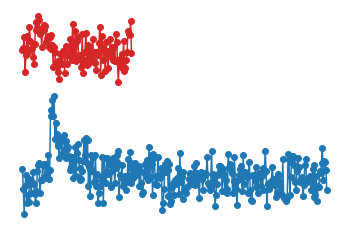

In [5]:
x = np.array(sig_1)
y = np.array(sig_2)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 5, "-o", c="C0")
plt.axis("off")

In [7]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

Alignment cost: 216.0746
Normalized alignment cost: 0.4578


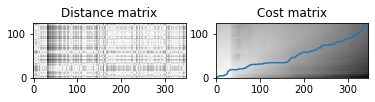

In [9]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-17.3, 363.3, -7.734861700000001, 8.8824577)

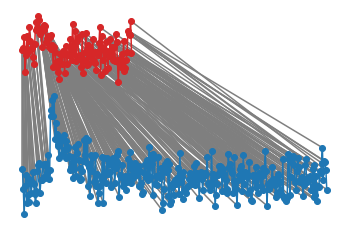

In [11]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 5, y[y_j] - 5])
plt.plot(np.arange(x.shape[0]), x + 5, "-o")
plt.plot(np.arange(y.shape[0]), y - 5, "-o")
plt.axis("off")